# **IntrusiShield : Navigating Safely through Cyber Tides**
This is the code for the final year project entitled "**IntrusiShield : Navigating Safely through Cyber Tides"** developed by using CNN-based models in machine learning.

---
## **Data Preprocessing**
Data Preprocessing involve the following procedures:

  1) Read the dataset

  2) Transform the tabular data into images

  3) Display the transformed images

  4) Split the training and test set

  **Overview of dataset :**
  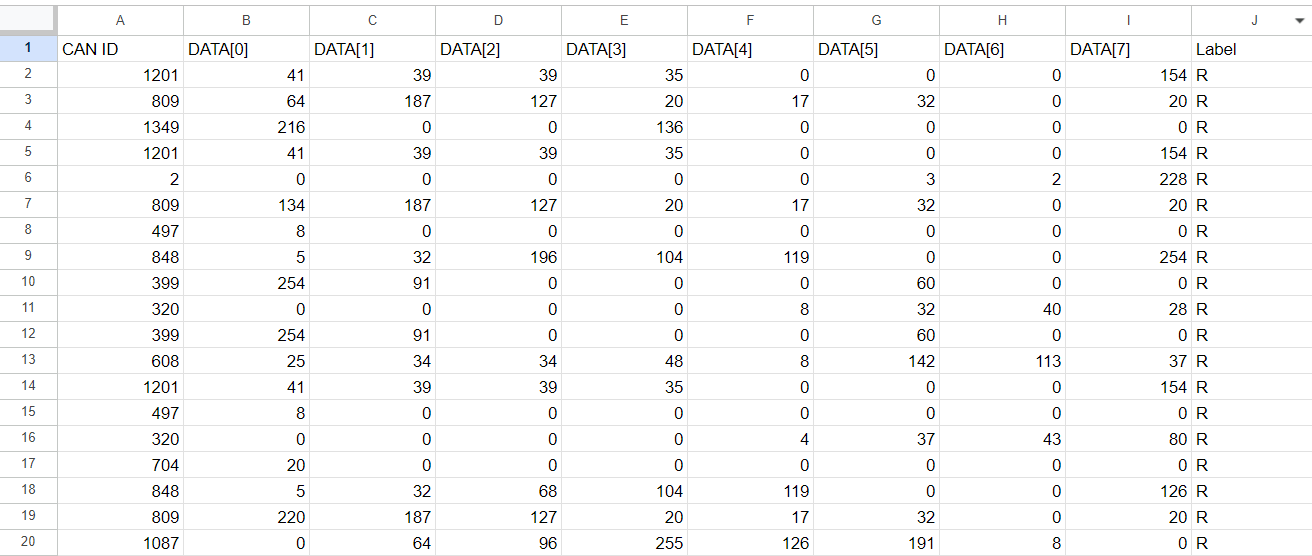

## **Import libraries**

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import math
import random
import matplotlib.pyplot as plt
import shutil
from sklearn.preprocessing import QuantileTransformer
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

## **Read the CAN-Intrusion dataset**
The complete Car-Hacking dataset is publicly available at: https://ocslab.hksecurity.net/Datasets/CAN-intrusion-dataset

 In this project, due to the excess of data around 818000+ data samples, we use the 5% subset for optimized training of model.

In [2]:
#Read dataset
dataset=pd.read_csv('data/Car_Hacking_5_.csv')

In [3]:
# Define the percentage of data to use (e.g., 20%)
percentage_to_use = 5

# Calculate the number of samples to use
num_samples = int(len(dataset) * percentage_to_use / 100)

# Randomly sample the data
df = dataset.sample(n=num_samples, random_state=42)  # Set random_state for reproducibility


In [4]:
df

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7],Label
515957,320,0,0,0,0,6,38,33,85,R
525394,2,0,0,0,0,0,7,0,243,R
520618,704,21,0,0,0,0,0,0,0,R
697040,497,8,0,0,0,0,0,0,0,R
675396,608,25,33,31,48,8,141,105,14,R
...,...,...,...,...,...,...,...,...,...,...
262278,320,0,0,0,0,2,19,35,201,R
495835,809,135,183,126,20,17,32,0,20,R
345572,790,5,34,116,9,34,33,0,110,R
256730,320,0,0,0,0,24,8,34,249,R


In [5]:
# The labels of the dataset. "R" indicates normal patterns, and there are four types of attack (DoS, fuzzy. gear spoofing, and RPM spoofing zttacks)
df.Label.value_counts()

Label
R        35002
RPM       1619
DoS       1542
gear      1497
Fuzzy     1262
Name: count, dtype: int64

## **Data Transformation**
Further we convert tabular data to images in following ways:

1. Use quantile transform to transform the original data samples into the scale of
[0,255], representing pixel values
2. Generate images for each category (Normal, DoS, Fuzzy, Gear, RPM), each image consists of 27 data samples with 9 features. Thus, the size of each image is 993, length 9, width 9, and 3 color channels (RGB).




In [6]:
# Transform all features into the scale of [0,1]
numeric_features = df.dtypes[df.dtypes != 'object'].index
scaler = QuantileTransformer()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [7]:
# Multiply the feature values by 255 to transform them into the scale of [0,255]
df[numeric_features] = df[numeric_features].apply(
    lambda x: (x*255))

In [8]:
df.describe()

,CAN ID,DATA[0],DATA[1],DATA[2],DATA[3],DATA[4],DATA[5],DATA[6],DATA[7]
count,40922.000000,40922.000000,40922.000000,40922.000000,40922.000000,40922.000000,40922.000000,40922.000000,40922.000000
mean,127.965580,113.235535,106.918247,89.384258,109.078013,105.560088,112.681166,85.561529,92.914935
std,73.834360,90.220977,93.163323,100.563144,103.344932,95.969406,90.556083,101.579069,100.207656
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.770270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,123.543544,125.585586,136.306306,0.000000,128.010511,128.138138,129.031532,0.000000,0.000000
75%,191.569069,192.590090,191.824324,198.971471,187.867868,194.249249,189.782282,192.334835,190.930931
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


All features are in the same scale of [0,255]

## **Generate images for each class**

In [9]:
df0=df[df['Label']=='R'].drop(['Label'],axis=1)
df1=df[df['Label']=='RPM'].drop(['Label'],axis=1)
df2=df[df['Label']=='gear'].drop(['Label'],axis=1)
df3=df[df['Label']=='DoS'].drop(['Label'],axis=1)
df4=df[df['Label']=='Fuzzy'].drop(['Label'],axis=1)

In [10]:
# Generate 9*9 color images for class 0 (Normal)
count=0
ims = []

image_path = "train/0/"
os.makedirs(image_path, exist_ok=True)

for i in range(0, len(df0)):
    count=count+1
    if count<=27:
        im=df0.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [11]:
# Generate 9*9 color images for class 1 (RPM spoofing)
count=0
ims = []

image_path = "train/1/"
os.makedirs(image_path, exist_ok=True)

for i in range(0, len(df1)):
    count=count+1
    if count<=27:
        im=df1.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [12]:
# Generate 9*9 color images for class 2 (Gear spoofing)
count=0
ims = []

image_path = "train/2/"
os.makedirs(image_path, exist_ok=True)

for i in range(0, len(df2)):
    count=count+1
    if count<=27:
        im=df2.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [13]:
# Generate 9*9 color images for class 3 (DoS attack)
count=0
ims = []

image_path = "train/3/"
os.makedirs(image_path, exist_ok=True)


for i in range(0, len(df3)):
    count=count+1
    if count<=27:
        im=df3.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

In [14]:
# Generate 9*9 color images for class 4 (Fuzzy attack)
count=0
ims = []

image_path = "train/4/"
os.makedirs(image_path, exist_ok=True)


for i in range(0, len(df4)):
    count=count+1
    if count<=27:
        im=df4.iloc[i].values
        ims=np.append(ims,im)
    else:
        ims=np.array(ims).reshape(9,9,3)
        array = np.array(ims, dtype=np.uint8)
        new_image = Image.fromarray(array)
        new_image.save(image_path+str(i)+'.png')
        count=0
        ims = []

## **Split the training and test set**

In [15]:
# Create folders to store images
Train_Dir='./train/'
Val_Dir='./test/'
allimgs=[]
for subdir in os.listdir(Train_Dir):
    for filename in os.listdir(os.path.join(Train_Dir,subdir)):
        filepath=os.path.join(Train_Dir,subdir,filename)
        allimgs.append(filepath)
print(len(allimgs)) # Print the total number of images

1460


In [16]:
#split a test set from the dataset, train/test size = 80%/20%
Numbers=len(allimgs)//5 	#size of test set (20%)

def mymovefile(srcfile,dstfile):
    if not os.path.isfile(srcfile):
        print ("%s not exist!"%(srcfile))
    else:
        fpath,fname=os.path.split(dstfile)
        if not os.path.exists(fpath):
            os.makedirs(fpath)
        shutil.move(srcfile,dstfile)
        #print ("move %s -> %s"%(srcfile,dstfile))

In [17]:
# The size of test set
Numbers

292

In [18]:
# Create the test set
val_imgs=random.sample(allimgs,Numbers)
for img in val_imgs:
    dest_path=img.replace(Train_Dir,Val_Dir)
    mymovefile(img,dest_path)
print('Finish creating test set')

Finish creating test set


In [19]:
#resize the images 224*224 for better CNN training
def get_224(folder,dstdir):
    imgfilepaths=[]
    for root,dirs,imgs in os.walk(folder):
        for thisimg in imgs:
            thisimg_path=os.path.join(root,thisimg)
            imgfilepaths.append(thisimg_path)
    for thisimg_path in imgfilepaths:
        dir_name,filename=os.path.split(thisimg_path)
        dir_name=dir_name.replace(folder,dstdir)
        new_file_path=os.path.join(dir_name,filename)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        img=cv2.imread(thisimg_path)
        img=cv2.resize(img,(224,224))
        cv2.imwrite(new_file_path,img)
    print('Finish resizing'.format(folder=folder))

In [20]:
DATA_DIR_224='./train_224/'
get_224(folder='./train/',dstdir=DATA_DIR_224)

Finish resizing


In [21]:
DATA_DIR2_224='./test_224/'
get_224(folder='./test/',dstdir=DATA_DIR2_224)

Finish resizing


## **Display samples for each category**

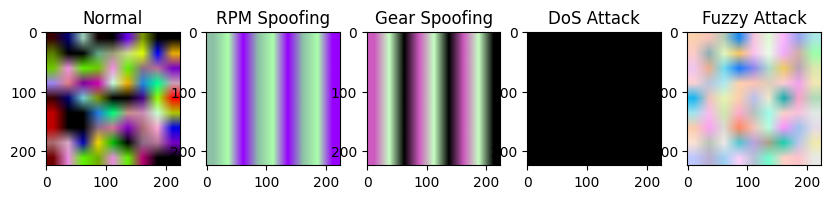

In [22]:
# Read the images for each category, the file name may vary (27.png, 83.png...)
img1 = Image.open('./train_224/0/27.png')
img2 = Image.open('./train_224/1/27.png')
img3 = Image.open('./train_224/2/27.png')
img4 = Image.open('./train_224/3/83.png')
img5 = Image.open('./train_224/4/83.png')

plt.figure(figsize=(10, 10))
plt.subplot(1,5,1)
plt.imshow(img1)
plt.title("Normal")
plt.subplot(1,5,2)
plt.imshow(img2)
plt.title("RPM Spoofing")
plt.subplot(1,5,3)
plt.imshow(img3)
plt.title("Gear Spoofing")
plt.subplot(1,5,4)
plt.imshow(img4)
plt.title("DoS Attack")
plt.subplot(1,5,5)
plt.imshow(img5)
plt.title("Fuzzy Attack")
plt.show()  # display it

# **CNN Model Development**

---
For CNN Model Development the following process were involved :

  1) Generate training and test images

  2) Construct CNN models (a CNN model by own, Xception, VGG16, VGG19, Resnet, Inception, InceptionResnet)

  3) Tune the hyperparameters of CNN models (hyperparameter optimization)


## **Import libraries**

In [34]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,Input,Conv2D,MaxPooling2D,Dropout
from keras.models import Model,load_model,Sequential
from keras.applications.xception import  Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import  ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.mobilenet import MobileNet
import keras.callbacks as kcallbacks
import keras
from keras.preprocessing.image import load_img,img_to_array
import math
import random
from keras.utils import plot_model
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from PIL import Image
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

## **Generate Training and Test Images**

In [40]:
#generate training and test images
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128	#could try 128 or 32

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        './train_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 1460 images belonging to 5 classes.
Found 1072 images belonging to 5 classes.


## **Define the image plotting functions**

In [41]:
#plot the figures
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))
    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # acc
            plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
            # loss
            plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [42]:
history_this= LossHistory()

## ***Model 1: a CNN model by own (baseline)***

# **Construct CNN models**

---



Found 1460 images belonging to 5 classes.
Found 1072 images belonging to 5 classes.
Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7300 - loss: 0.8213
Epoch 1: val_accuracy improved from -inf to 0.89844, saving model to ./model_own.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 163s 7s/step - accuracy: 0.7341 - loss: 0.8093 - val_accuracy: 0.8984 - val_loss: 0.1834
Epoch 2/5
 1/22 ━━━━━━━━━━━━━━━━━━━━ 2:06 6s/step - accuracy: 0.9219 - loss: 0.1853
Epoch 2: val_accuracy improved from 0.89844 to 0.93750, saving model to ./model_own.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 212ms/step - accuracy: 0.9219 - loss: 0.1853 - val_accuracy: 0.9375 - val_loss: 0.0941
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9439 - loss: 0.1463
Epoch 3: val_accuracy improved from 0.93750 to 1.00000, saving model to ./model_own.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 148s 7s/step - accuracy: 0.9454 - loss: 0.1438 - val_accuracy: 1.0000 - val_loss: 0.0170
Epoch 4/5
 1/22 ━━━━━━━━━━━━━━━━━━━━ 1:57 6s/step -

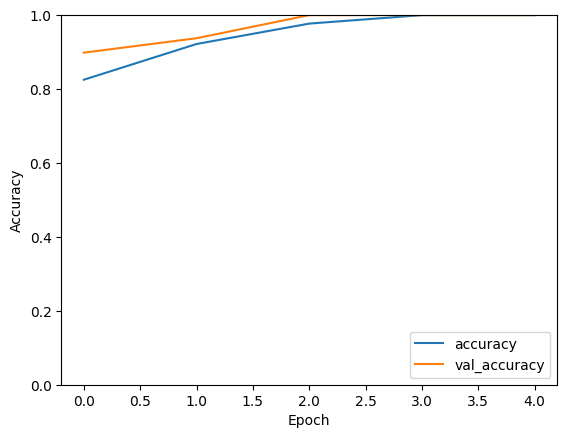

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Define the input size and number of classes
INPUT_SIZE = (224, 224, 3)
NUM_CLASSES = 5

# Define the paths to your training and validation directories
train_data_dir = './train_224/'  # Ensure this path is correct
validation_data_dir = './test_224/'  # Ensure this path is correct

# Set batch size
BATCH_SIZE = 64  # Using a smaller batch size to avoid memory issues

# Ensure the directories exist
if not os.path.exists(train_data_dir):
    raise ValueError(f"Training directory '{train_data_dir}' does not exist.")
if not os.path.exists(validation_data_dir):
    raise ValueError(f"Validation directory '{validation_data_dir}' does not exist.")

# Generate training and test images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

def cnn_by_own(input_shape, num_class, epochs, train_generator, validation_generator, savepath='./model_own.keras'):
    # Define the model
    model = Sequential([
        Conv2D(32, (3, 3), strides=(1, 1), input_shape=input_shape, padding='same', activation='relu'),
        Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
        Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(rate=0.5),
        Dense(num_class, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='auto')
    model_checkpoint = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    # Train the model
    try:
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // BATCH_SIZE,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // BATCH_SIZE,
            callbacks=[early_stopping, model_checkpoint],
            verbose=1
        )
    except Exception as e:
        print(f"An error occurred during model training: {e}")
        raise

    return history

# Call the function to train the model
try:
    history = cnn_by_own(input_shape=INPUT_SIZE, num_class=NUM_CLASSES, epochs=5, train_generator=train_generator, validation_generator=validation_generator)
except Exception as e:
    print(f"Error during model training: {e}")

# Plot the training history if training was successful
if 'history' in locals():
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()


**Training accuracy of a CNN by own : 100%**

## ***Model 2: Xception***

TensorFlow Version: 2.16.1
Found 1460 images belonging to 5 classes.
Found 1072 images belonging to 5 classes.
Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7848 - loss: 0.7862
Epoch 1: val_accuracy improved from -inf to 0.97443, saving model to ./xception.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 261s 6s/step - accuracy: 0.7869 - loss: 0.7796 - val_accuracy: 0.9744 - val_loss: 0.1821
Epoch 2/5
 1/45 ━━━━━━━━━━━━━━━━━━━━ 2:39 4s/step - accuracy: 1.0000 - loss: 0.1763
Epoch 2: val_accuracy improved from 0.97443 to 1.00000, saving model to ./xception.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 1.0000 - loss: 0.1763 - val_accuracy: 1.0000 - val_loss: 0.2263
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9718 - loss: 0.1790
Epoch 3: val_accuracy did not improve from 1.00000
45/45 ━━━━━━━━━━━━━━━━━━━━ 251s 6s/step - accuracy: 0.9719 - loss: 0.1783 - val_accuracy: 0.9924 - val_loss: 0.0864
Epoch 4/5
 1/45 ━━━━━━━━━━━━━━━━━━━━ 2:09 3s/step - accuracy: 1.000

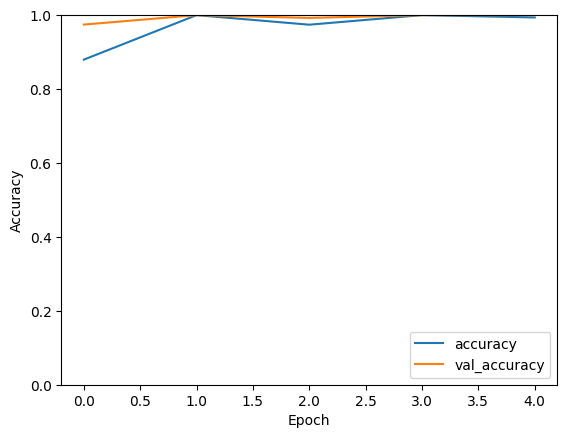

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Verify TensorFlow version
print("TensorFlow Version:", tf.__version__)

# Define the input size and number of classes
INPUT_SIZE = (224, 224, 3)
NUM_CLASSES = 5

# Define the paths to your training and validation directories
train_data_dir = './train_224/'  # Ensure this path is correct
validation_data_dir = './test_224/'  # Ensure this path is correct

# Set batch size
BATCH_SIZE = 32  # Using a smaller batch size to avoid memory issues

# Ensure the directories exist
if not os.path.exists(train_data_dir):
    raise ValueError(f"Training directory '{train_data_dir}' does not exist.")
if not os.path.exists(validation_data_dir):
    raise ValueError(f"Validation directory '{validation_data_dir}' does not exist.")

# Generate training and test images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

def xception_model(num_class, epochs, savepath='./xception.keras', input_shape=INPUT_SIZE):
    # Load pre-trained Xception model
    base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze layers up to the last 131 layers
    for layer in base_model.layers[:131]:
        layer.trainable = False

    # Add custom classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_class, activation='softmax')(x)

    # Create model
    model = Model(inputs=base_model.input, outputs=outputs)

    # Compile model
    optimizer = Adam(learning_rate=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, mode='auto')
    model_checkpoint = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    # Train model
    try:
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // BATCH_SIZE,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // BATCH_SIZE,
            callbacks=[early_stopping, model_checkpoint],
            verbose=1
        )
    except Exception as e:
        print(f"An error occurred during model training: {e}")
        raise

    return history

# Call the function to train the model
try:
    history = xception_model(num_class=NUM_CLASSES, epochs=5)
except Exception as e:
    print(f"Error during model training: {e}")

# Plot the training history if training was successful
if 'history' in locals():
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

**Training accuracy of Xception: 98.8%**

## ***Model 3: VGG16***

TensorFlow Version: 2.16.1
Found 1460 images belonging to 5 classes.
Found 1072 images belonging to 5 classes.
Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8072 - loss: 0.7937
Epoch 1: val_accuracy improved from -inf to 0.95739, saving model to ./VGG16.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 576s 13s/step - accuracy: 0.8090 - loss: 0.7850 - val_accuracy: 0.9574 - val_loss: 0.0870
Epoch 2/5
 1/45 ━━━━━━━━━━━━━━━━━━━━ 5:56 8s/step - accuracy: 0.8750 - loss: 0.2049
Epoch 2: val_accuracy improved from 0.95739 to 1.00000, saving model to ./VGG16.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.8750 - loss: 0.2049 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9844 - loss: 0.0603
Epoch 3: val_accuracy did not improve from 1.00000
45/45 ━━━━━━━━━━━━━━━━━━━━ 561s 13s/step - accuracy: 0.9843 - loss: 0.0609 - val_accuracy: 0.9782 - val_loss: 0.0688
Epoch 4/5
 1/45 ━━━━━━━━━━━━━━━━━━━━ 5:57 8s/step - accuracy: 1.00

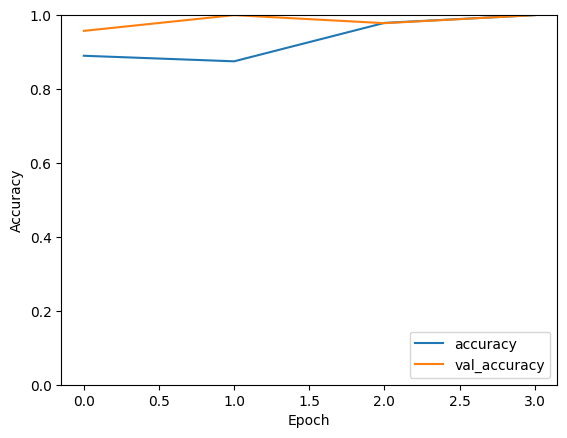

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Verify TensorFlow version
print("TensorFlow Version:", tf.__version__)

# Define the input size and number of classes
INPUT_SIZE = (224, 224, 3)
NUM_CLASSES = 5

# Define the paths to your training and validation directories
train_data_dir = './train_224/'  # Ensure this path is correct
validation_data_dir = './test_224/'  # Ensure this path is correct

# Set batch size
BATCH_SIZE = 32  # Using a smaller batch size to avoid memory issues

# Ensure the directories exist
if not os.path.exists(train_data_dir):
    raise ValueError(f"Training directory '{train_data_dir}' does not exist.")
if not os.path.exists(validation_data_dir):
    raise ValueError(f"Validation directory '{validation_data_dir}' does not exist.")

# Generate training and test images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

def vgg16_model(num_class, epochs, savepath='./VGG16.keras', input_shape=INPUT_SIZE):
    # Load pre-trained VGG16 model
    base_model = tf.keras.applications.VGG16(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze layers up to the last 15 layers
    for layer in base_model.layers[:15]:
        layer.trainable = False

    # Add custom classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_class, activation='softmax')(x)

    # Create model
    model = Model(inputs=base_model.input, outputs=outputs)

    # Compile model
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
    model_checkpoint = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    # Train model
    try:
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // BATCH_SIZE,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // BATCH_SIZE,
            callbacks=[early_stopping, model_checkpoint],
            verbose=1
        )
    except Exception as e:
        print(f"An error occurred during model training: {e}")
        raise

    return history

# Call the function to train the model
try:
    history = vgg16_model(num_class=NUM_CLASSES, epochs=5)
except Exception as e:
    print(f"Error during model training: {e}")

# Plot the training history if training was successful
if 'history' in locals():
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()


**Training accuracy of VGG16 : 100%**



## ***Model 4: VGG19***

TensorFlow Version: 2.16.1
Found 1460 images belonging to 5 classes.
Found 1072 images belonging to 5 classes.
80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8603 - loss: 0.4024
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ./VGG19.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 691s 15s/step - accuracy: 0.8622 - loss: 0.3970 - val_accuracy: 1.0000 - val_loss: 7.0874e-06
Epoch 2/5
 1/45 ━━━━━━━━━━━━━━━━━━━━ 6:38 9s/step - accuracy: 1.0000 - loss: 2.0026e-05
Epoch 2: val_accuracy did not improve from 1.00000
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 1.0000 - loss: 2.0026e-05 - val_accuracy: 1.0000 - val_loss: 5.9306e-06
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9985 - loss: 0.0029
Epoch 3: val_accuracy did not improve from 1.00000
45/45 ━━━━━━━━━━━━━━━━━━━━ 692s 15s/step - accuracy: 0.9984 - loss: 0.0030 - val_accuracy: 1.0000 - val_loss: 5.0025e-05
Epoch 3: early stopping


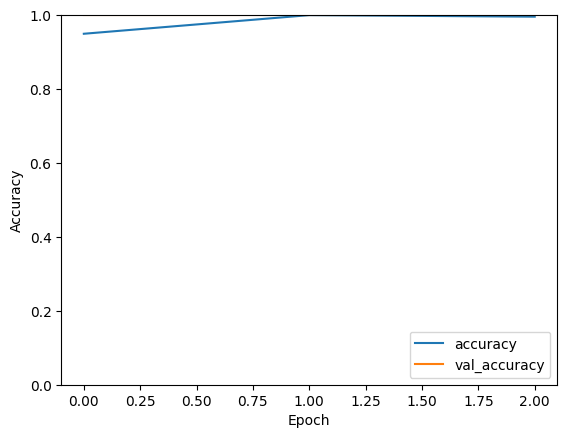

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Verify TensorFlow version
print("TensorFlow Version:", tf.__version__)

# Define the input size and number of classes
INPUT_SIZE = (224, 224, 3)
NUM_CLASSES = 5

# Define the paths to your training and validation directories
train_data_dir = './train_224/'  # Ensure this path is correct
validation_data_dir = './test_224/'  # Ensure this path is correct

# Set batch size
BATCH_SIZE = 32  # Using a smaller batch size to avoid memory issues

# Ensure the directories exist
if not os.path.exists(train_data_dir):
    raise ValueError(f"Training directory '{train_data_dir}' does not exist.")
if not os.path.exists(validation_data_dir):
    raise ValueError(f"Validation directory '{validation_data_dir}' does not exist.")

# Generate training and test images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

def vgg19_model(num_class, epochs, savepath='./VGG19.keras', input_shape=INPUT_SIZE):
    # Load pre-trained VGG19 model
    base_model = tf.keras.applications.VGG19(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze layers up to the last 19 layers
    for layer in base_model.layers[:19]:
        layer.trainable = False

    # Add custom classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_class, activation='softmax')(x)

    # Create model
    model = Model(inputs=base_model.input, outputs=outputs)

    # Compile model
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
    model_checkpoint = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    # Train model
    try:
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // BATCH_SIZE,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // BATCH_SIZE,
            callbacks=[early_stopping, model_checkpoint],
            verbose=1
        )
    except Exception as e:
        print(f"An error occurred during model training: {e}")
        raise

    return history

# Call the function to train the model
try:
    history = vgg19_model(num_class=NUM_CLASSES, epochs=5)
except Exception as e:
    print(f"Error during model training: {e}")

# Plot the training history if training was successful
if 'history' in locals():
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()



**Training accuracy of VGG19 : 99.84%**

## ***Model 5: ResNet***

TensorFlow Version: 2.16.1
Found 1460 images belonging to 5 classes.
Found 1072 images belonging to 5 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step
Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8213 - loss: 0.6304
Epoch 1: val_accuracy improved from -inf to 0.85890, saving model to ./resnet.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 275s 6s/step - accuracy: 0.8224 - loss: 0.6258 - val_accuracy: 0.8589 - val_loss: 1623.1436
Epoch 2/5
 1/45 ━━━━━━━━━━━━━━━━━━━━ 2:46 4s/step - accuracy: 0.7500 - loss: 0.5068
Epoch 2: val_accuracy improved from 0.85890 to 0.93750, saving model to ./resnet.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - accuracy: 0.7500 - loss: 0.5068 - val_accuracy: 0.9375 - val_loss: 679.9018
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9371 - loss: 0.1573
Epoch 3: val_accuracy did not improve from 0.93750
45/45 ━━━━━━━━━━━━━━━━━━━━ 251s 6s/step - accuracy: 0.9371 - loss: 0.1572 - val_accuracy: 0.8617 - val_loss: 2314.0359
Epoch 4/5
 

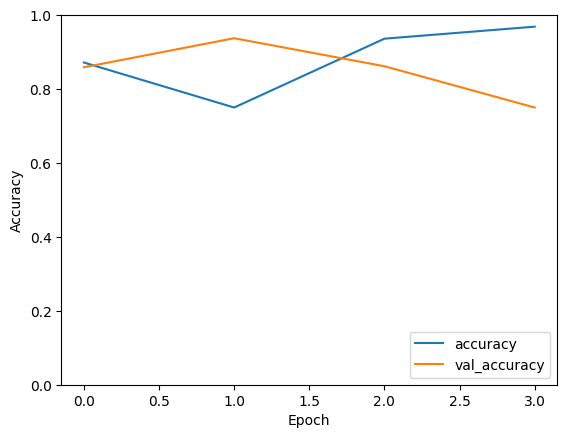

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Verify TensorFlow version
print("TensorFlow Version:", tf.__version__)

# Define the input size and number of classes
INPUT_SIZE = (224, 224, 3)
NUM_CLASSES = 5

# Define the paths to your training and validation directories
train_data_dir = './train_224/'  # Ensure this path is correct
validation_data_dir = './test_224/'  # Ensure this path is correct

# Set batch size
BATCH_SIZE = 32  # Using a smaller batch size to avoid memory issues

# Ensure the directories exist
if not os.path.exists(train_data_dir):
    raise ValueError(f"Training directory '{train_data_dir}' does not exist.")
if not os.path.exists(validation_data_dir):
    raise ValueError(f"Validation directory '{validation_data_dir}' does not exist.")

# Generate training and test images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

def resnet_model(num_class, epochs, savepath='./resnet.keras', input_shape=INPUT_SIZE):
    # Load pre-trained ResNet50 model
    base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze layers up to the last 120 layers
    for layer in base_model.layers[:120]:
        layer.trainable = False

    # Add custom classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_class, activation='softmax')(x)

    # Create model
    model = Model(inputs=base_model.input, outputs=outputs)

    # Compile model
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
    model_checkpoint = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    # Train model
    try:
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // BATCH_SIZE,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // BATCH_SIZE,
            callbacks=[early_stopping, model_checkpoint],
            verbose=1
        )
    except Exception as e:
        print(f"An error occurred during model training: {e}")
        raise

    return history

# Call the function to train the model
try:
    history = resnet_model(num_class=NUM_CLASSES, epochs=5)
except Exception as e:
    print(f"Error during model training: {e}")

# Plot the training history if training was successful
if 'history' in locals():
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()


**Training accuracy of Resnet : 96.88%**

## ***Model 6: Inception***

TensorFlow Version: 2.16.1
Found 1460 images belonging to 5 classes.
Found 1072 images belonging to 5 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step
Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8941 - loss: 0.2731
Epoch 1: val_accuracy improved from -inf to 0.04072, saving model to ./inception.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 278s 5s/step - accuracy: 0.8953 - loss: 0.2706 - val_accuracy: 0.0407 - val_loss: 3456.6523
Epoch 2/5
 1/45 ━━━━━━━━━━━━━━━━━━━━ 2:50 4s/step - accuracy: 1.0000 - loss: 0.0089
Epoch 2: val_accuracy did not improve from 0.04072
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.0000e+00 - val_loss: 3146.6436
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.9876 - loss: 0.0412
Epoch 3: val_accuracy improved from 0.04072 to 0.07102, saving model to ./inception.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 234s 5s/step - accuracy: 0.9877 - loss: 0.0412 - val_accuracy: 0.0710 - val_loss: 54.1678
Ep

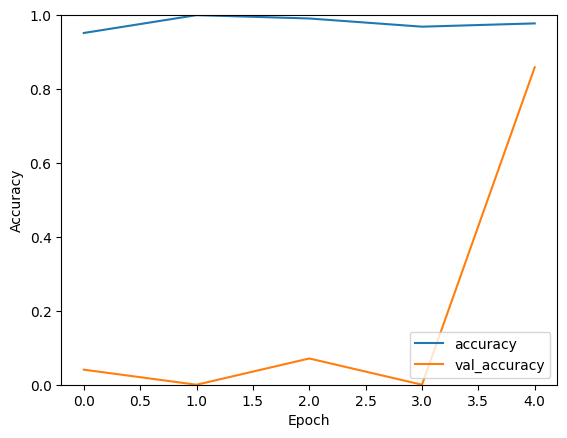

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Verify TensorFlow version
print("TensorFlow Version:", tf.__version__)

# Define the input size and number of classes
INPUT_SIZE = (224, 224, 3)
NUM_CLASSES = 5

# Define the paths to your training and validation directories
train_data_dir = './train_224/'  # Ensure this path is correct
validation_data_dir = './test_224/'  # Ensure this path is correct

# Set batch size
BATCH_SIZE = 32  # Using a smaller batch size to avoid memory issues

# Ensure the directories exist
if not os.path.exists(train_data_dir):
    raise ValueError(f"Training directory '{train_data_dir}' does not exist.")
if not os.path.exists(validation_data_dir):
    raise ValueError(f"Validation directory '{validation_data_dir}' does not exist.")

# Generate training and test images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

def inception_model(num_class, epochs, savepath='./inception.keras', input_shape=INPUT_SIZE):
    # Load pre-trained InceptionV3 model
    base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze layers up to the last 35 layers
    for layer in base_model.layers[:35]:
        layer.trainable = False

    # Add custom classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_class, activation='softmax')(x)

    # Create model
    model = Model(inputs=base_model.input, outputs=outputs)

    # Compile model
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
    model_checkpoint = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    # Train model
    try:
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // BATCH_SIZE,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // BATCH_SIZE,
            callbacks=[early_stopping, model_checkpoint],
            verbose=1
        )
    except Exception as e:
        print(f"An error occurred during model training: {e}")
        raise

    return history

# Call the function to train the model
try:
    history = inception_model(num_class=NUM_CLASSES, epochs=5)
except Exception as e:
    print(f"Error during model training: {e}")

# Plot the training history if training was successful
if 'history' in locals():
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()


**Training accuracy of Inception: 98.86%**



## ***Model 7: InceptionResnet***

TensorFlow Version: 2.16.1
Found 1460 images belonging to 5 classes.
Found 1072 images belonging to 5 classes.

219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 40s 0us/step
Epoch 1/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8495 - loss: 0.4219
Epoch 1: val_accuracy improved from -inf to 0.07576, saving model to ./inceptionresnet.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 434s 9s/step - accuracy: 0.8514 - loss: 0.4167 - val_accuracy: 0.0758 - val_loss: 163.0128
Epoch 2/5
 1/45 ━━━━━━━━━━━━━━━━━━━━ 4:02 6s/step - accuracy: 1.0000 - loss: 0.0023
Epoch 2: val_accuracy improved from 0.07576 to 0.12500, saving model to ./inceptionresnet.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 198ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.1250 - val_loss: 159.5767
Epoch 3/5
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9839 - loss: 0.0572
Epoch 3: val_accuracy improved from 0.12500 to 0.86080, saving model to ./inceptionresnet.keras
45/45 ━━━━━━━━━━━━━━━━━━━━ 380s 8s/step - accuracy: 0.9839 - lo

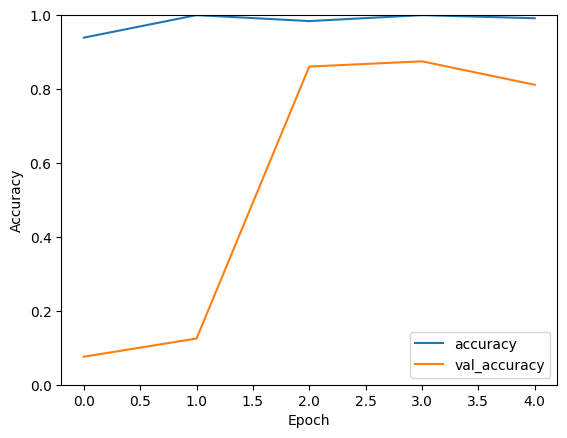

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Verify TensorFlow version
print("TensorFlow Version:", tf.__version__)

# Define the input size and number of classes
INPUT_SIZE = (224, 224, 3)
NUM_CLASSES = 5

# Define the paths to your training and validation directories
train_data_dir = './train_224/'  # Ensure this path is correct
validation_data_dir = './test_224/'  # Ensure this path is correct

# Set batch size
BATCH_SIZE = 32  # Using a smaller batch size to avoid memory issues

# Ensure the directories exist
if not os.path.exists(train_data_dir):
    raise ValueError(f"Training directory '{train_data_dir}' does not exist.")
if not os.path.exists(validation_data_dir):
    raise ValueError(f"Validation directory '{validation_data_dir}' does not exist.")

# Generate training and test images
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

def inceptionresnet_model(num_class, epochs, savepath='./inceptionresnet.keras', input_shape=INPUT_SIZE):
    # Load pre-trained InceptionResNetV2 model
    base_model = tf.keras.applications.InceptionResNetV2(include_top=False, weights='imagenet', input_shape=input_shape)

    # Freeze layers up to the last 500 layers
    for layer in base_model.layers[:500]:
        layer.trainable = False

    # Add custom classification head
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_class, activation='softmax')(x)

    # Create model
    model = Model(inputs=base_model.input, outputs=outputs)

    # Compile model
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=2, verbose=1, mode='auto')
    model_checkpoint = ModelCheckpoint(filepath=savepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

    # Train model
    try:
        history = model.fit(
            train_generator,
            steps_per_epoch=train_generator.samples // BATCH_SIZE,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=validation_generator.samples // BATCH_SIZE,
            callbacks=[early_stopping, model_checkpoint],
            verbose=1
        )
    except Exception as e:
        print(f"An error occurred during model training: {e}")
        raise

    return history

# Call the function to train the model
try:
    history = inceptionresnet_model(num_class=NUM_CLASSES, epochs=5)
except Exception as e:
    print(f"Error during model training: {e}")

# Plot the training history if training was successful
if 'history' in locals():
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()


**Training accuracy of InceptionResnet : 99.42%**

## **Use the original CNN base models to make predictions**

---
## **Import libraries**


In [61]:
import warnings
warnings.filterwarnings("ignore")
import keras
from keras.models import Model,load_model
from keras import Input
from keras.layers import concatenate,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
import keras.callbacks as kcallbacks
import os
import math
from keras.utils import plot_model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, LearningRateScheduler
from keras.optimizers import SGD
import operator
import numpy as np
from PIL import Image
from collections import defaultdict

## **Read the test set**

In [62]:
#generate images from train set and validation set
TARGET_SIZE=(224,224)
INPUT_SIZE=(224,224,3)
BATCHSIZE=128

test_datagen = ImageDataGenerator(rescale=1./255)


validation_generator = test_datagen.flow_from_directory(
        './test_224/',
        target_size=TARGET_SIZE,
        batch_size=BATCHSIZE,
        class_mode='categorical')

Found 1072 images belonging to 5 classes.


In [63]:
#generate labels indicating disease (1) or normal (0)
label=validation_generator.class_indices
label={v: k for k, v in label.items()}

In [64]:
print(label)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4'}


In [65]:
#read images from validation folder
rootdir = './test_224/'
test_laels = []
test_images=[]
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        if not (file.endswith(".jpeg"))|(file.endswith(".jpg"))|(file.endswith(".png")):
            continue
        test_laels.append(subdir.split('/')[-1])
        test_images.append(os.path.join(subdir, file))

print(test_laels[0],test_images[0])

0 ./test_224/0\10023.png


## **Load 5 trained CNN models**

In [66]:
#load model 1: xception
xception_model=load_model('./xception.keras')

In [67]:
#load model 2: VGG16
vgg_model=load_model('./VGG16.keras')

In [68]:
#load model 3: VGG19
vgg19_model=load_model('./VGG19.keras')

In [69]:
#load model 4: inception
incep_model=load_model('./inception.keras')

In [70]:
#load model 5: inceptionresnet
inres_model=load_model('./inceptionresnet.keras')

In [71]:
#load model 6: resnet
res_model=load_model('./resnet.keras')

## **1. Xception**


In [76]:
# Assuming you have trained your model
model = load_model('./xception.keras')

# Make predictions
predictions = model.predict(validation_generator)
predict = np.argmax(predictions, axis=1)

# Now you can calculate the evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Get true labels
test_labels = validation_generator.classes

acc = accuracy_score(test_labels, predict)
pre = precision_score(test_labels, predict, average='weighted')
re = recall_score(test_labels, predict, average='weighted')
f1 = f1_score(test_labels, predict, average='weighted')

print('Xception accuracy:', acc)
print('precision:', pre)
print('recall:', re)
print('f1:', f1)

print(confusion_matrix(test_labels, predict))
target_names = ['0', '1', '2', '3', '4']
print(classification_report(test_labels, predict, target_names=target_names))



9/9 ━━━━━━━━━━━━━━━━━━━━ 102s 10s/step
Xception accuracy: 0.7714552238805971
precision: 0.7497188713964424
recall: 0.7714552238805971
f1: 0.7604302113164801
[[819  38  34  31   0]
 [ 35   2   3   3   0]
 [ 37   1   3   0   0]
 [ 34   1   1   3   0]
 [ 24   1   0   2   0]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       922
           1       0.05      0.05      0.05        43
           2       0.07      0.07      0.07        41
           3       0.08      0.08      0.08        39
           4       0.00      0.00      0.00        27

    accuracy                           0.77      1072
   macro avg       0.21      0.22      0.21      1072
weighted avg       0.75      0.77      0.76      1072



## **2. VGG16**

In [79]:
# Assuming you have trained your model
model = load_model('./VGG16.keras')

# Make predictions
predictions = model.predict(validation_generator)
predict = np.argmax(predictions, axis=1)

# Now you can calculate the evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Get true labels
test_labels = validation_generator.classes

acc = accuracy_score(test_labels, predict)
pre = precision_score(test_labels, predict, average='weighted')
re = recall_score(test_labels, predict, average='weighted')
f1 = f1_score(test_labels, predict, average='weighted')

print('VGG16 accuracy:', acc)
print('precision:', pre)
print('recall:', re)
print('f1:', f1)

print(confusion_matrix(test_labels, predict))
target_names = ['0', '1', '2', '3', '4']
print(classification_report(test_labels, predict, target_names=target_names))


9/9 ━━━━━━━━━━━━━━━━━━━━ 266s 30s/step
VGG16 accuracy: 0.7444029850746269
precision: 0.7428038379530916
recall: 0.7444029850746269
f1: 0.7436025452369787
[[792  38  37  32  23]
 [ 37   2   1   2   1]
 [ 36   1   2   2   0]
 [ 35   0   1   2   1]
 [ 24   2   0   1   0]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       922
           1       0.05      0.05      0.05        43
           2       0.05      0.05      0.05        41
           3       0.05      0.05      0.05        39
           4       0.00      0.00      0.00        27

    accuracy                           0.74      1072
   macro avg       0.20      0.20      0.20      1072
weighted avg       0.74      0.74      0.74      1072



## **3. VGG19**

In [80]:
# Assuming you have trained your model
model = vgg19_model

# Make predictions
predictions = model.predict(validation_generator)
predict = np.argmax(predictions, axis=1)

# Now you can calculate the evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Get true labels
test_labels = validation_generator.classes

acc = accuracy_score(test_labels, predict)
pre = precision_score(test_labels, predict, average='weighted')
re = recall_score(test_labels, predict, average='weighted')
f1 = f1_score(test_labels, predict, average='weighted')

print('VGG19 accuracy:', acc)
print('precision:', pre)
print('recall:', re)
print('f1:', f1)

print(confusion_matrix(test_labels, predict))
target_names = ['0', '1', '2', '3', '4']
print(classification_report(test_labels, predict, target_names=target_names))

9/9 ━━━━━━━━━━━━━━━━━━━━ 323s 35s/step
VGG19 accuracy: 0.7434701492537313
precision: 0.7434701492537313
recall: 0.7434701492537313
f1: 0.7434701492537313
[[794  35  38  32  23]
 [ 38   1   2   1   1]
 [ 38   1   0   1   1]
 [ 31   4   0   2   2]
 [ 21   2   1   3   0]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       922
           1       0.02      0.02      0.02        43
           2       0.00      0.00      0.00        41
           3       0.05      0.05      0.05        39
           4       0.00      0.00      0.00        27

    accuracy                           0.74      1072
   macro avg       0.19      0.19      0.19      1072
weighted avg       0.74      0.74      0.74      1072



## **4. Inception**

In [81]:
# Assuming you have trained your model
model = incep_model

# Make predictions
predictions = model.predict(validation_generator)
predict = np.argmax(predictions, axis=1)

# Now you can calculate the evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Get true labels
test_labels = validation_generator.classes

acc = accuracy_score(test_labels, predict)
pre = precision_score(test_labels, predict, average='weighted')
re = recall_score(test_labels, predict, average='weighted')
f1 = f1_score(test_labels, predict, average='weighted')

print('Inception accuracy:', acc)
print('precision:', pre)
print('recall:', re)
print('f1:', f1)

print(confusion_matrix(test_labels, predict))
target_names = ['0', '1', '2', '3', '4']
print(classification_report(test_labels, predict, target_names=target_names))

9/9 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step
Inception accuracy: 0.8600746268656716
precision: 0.7397283637781242
recall: 0.8600746268656716
f1: 0.7953749307624365
[[922   0   0   0   0]
 [ 43   0   0   0   0]
 [ 41   0   0   0   0]
 [ 39   0   0   0   0]
 [ 27   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       922
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00        27

    accuracy                           0.86      1072
   macro avg       0.17      0.20      0.18      1072
weighted avg       0.74      0.86      0.80      1072



## **5. InceptionResnet**

In [82]:
# Assuming you have trained your model
model = inres_model

# Make predictions
predictions = model.predict(validation_generator)
predict = np.argmax(predictions, axis=1)

# Now you can calculate the evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Get true labels
test_labels = validation_generator.classes

acc = accuracy_score(test_labels, predict)
pre = precision_score(test_labels, predict, average='weighted')
re = recall_score(test_labels, predict, average='weighted')
f1 = f1_score(test_labels, predict, average='weighted')

print('InceptionResnet accuracy:', acc)
print('precision:', pre)
print('recall:', re)
print('f1:', f1)

print(confusion_matrix(test_labels, predict))
target_names = ['0', '1', '2', '3', '4']
print(classification_report(test_labels, predict, target_names=target_names))

9/9 ━━━━━━━━━━━━━━━━━━━━ 152s 16s/step
InceptionResnet accuracy: 0.8591417910447762
precision: 0.7396159956519922
recall: 0.8591417910447762
f1: 0.7949109195617498
[[921   0   0   0   1]
 [ 43   0   0   0   0]
 [ 41   0   0   0   0]
 [ 39   0   0   0   0]
 [ 27   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       922
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00        27

    accuracy                           0.86      1072
   macro avg       0.17      0.20      0.18      1072
weighted avg       0.74      0.86      0.79      1072



## **6. Resnet**

In [83]:
# Assuming you have trained your model
model = res_model

# Make predictions
predictions = model.predict(validation_generator)
predict = np.argmax(predictions, axis=1)

# Now you can calculate the evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Get true labels
test_labels = validation_generator.classes

acc = accuracy_score(test_labels, predict)
pre = precision_score(test_labels, predict, average='weighted')
re = recall_score(test_labels, predict, average='weighted')
f1 = f1_score(test_labels, predict, average='weighted')

print('Resnet accuracy:', acc)
print('precision:', pre)
print('recall:', re)
print('f1:', f1)

print(confusion_matrix(test_labels, predict))
target_names = ['0', '1', '2', '3', '4']
print(classification_report(test_labels, predict, target_names=target_names))

9/9 ━━━━━━━━━━━━━━━━━━━━ 100s 11s/step
Resnet accuracy: 0.8600746268656716
precision: 0.7397283637781242
recall: 0.8600746268656716
f1: 0.7953749307624365
[[922   0   0   0   0]
 [ 43   0   0   0   0]
 [ 41   0   0   0   0]
 [ 39   0   0   0   0]
 [ 27   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       922
           1       0.00      0.00      0.00        43
           2       0.00      0.00      0.00        41
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00        27

    accuracy                           0.86      1072
   macro avg       0.17      0.20      0.18      1072
weighted avg       0.74      0.86      0.80      1072

